# Machine Learning II Project

Group Members:
- Daniel Kruk 20211687
- Marcelo Junior 20211677<br>

# Customer Segmentation <br>
The main goal of this notebook is to identify relevant customer segments using statistical and machine learning techniques. In Notebook 1, we explored the customer_info and customer_basket datasets and performed some data cleaning and preprocessing. In this notebook, we will use these datasets to cluster customers based on their shared characteristics and develop targeted marketing strategies.

## Libraries
Firstly, we will import the needed libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


# Optional Intel Acceleration
#from sklearnex import patch_sklearn
#patch_sklearn()


## Preparing the data
In this step, we will prepare the data for clustering.<br>
The importation of the data will be followed by the removal of unecessary columns for this part.

In [ ]:
# Dataset Importation
#path = '/Users/marcelojunior/Documents/Nova IMS - Lisboa (2021 - 2024)/4º Semestre/Machine Learning II.nosync/KeizerKrukis/Project Data/'

# Customer Info Preprocessed
customer_info_ppc = pd.read_csv("Customer Info PPC.csv")

# Customer Basket Preprocessed
#customer_basket_ppc = pd.read_csv("Customer Basket PPC.csv")

In [ ]:
customer_info_ppc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29774 entries, 0 to 29773
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customer_id                              29774 non-null  int64  
 1   customer_name                            29774 non-null  object 
 2   highest_education                        29774 non-null  int64  
 3   customer_gender                          29774 non-null  int64  
 4   Age                                      29774 non-null  int64  
 5   kids_home                                29774 non-null  float64
 6   teens_home                               29774 non-null  float64
 7   number_complaints                        29774 non-null  float64
 8   distinct_stores_visited                  29774 non-null  float64
 9   lifetime_spend_groceries                 29774 non-null  float64
 10  lifetime_spend_electronics               29774

We will now create a dataset for the segmentation. For better results, we shall remove the binary and other identifiers.

In [ ]:
# Loyalty_card_number is useless for this part.
# As per advice, binary variables will be dropped for the segmentation, but will be analysed a posteriori
# strings, such as customer_name should always be dropped and customer_id, as its values do not represent anything

#customer_info_seg = customer_info_ppc.drop(['loyalty_card_number', 'has_loyalty_card', 'customer_name',
#                                            'customer_id', 'customer_gender',
#                                            'latitude', 'longitude'], axis = 1)

customer_info_seg = customer_info_ppc.drop(['loyalty_card_number', 'customer_name', 'customer_id',
                                            'latitude', 'longitude'], axis = 1)


In [ ]:
customer_info_seg

,customer_id,highest_education,customer_gender,Age,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,...,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,has_loyalty_card,family_size,total_spending
0,4239,0,0,23,0.0,0.0,0.0,2.0,91.0,20.0,...,53.0,48.0,47.0,105.0,85.0,0.192154,2017.0,0,0.0,1545.0
1,19330,0,1,41,1.0,0.0,0.0,2.0,197.0,5958.0,...,86.0,80.0,45.0,1964.0,85.0,0.098647,2015.0,0,1.0,10219.0
2,2272,3,0,36,1.0,1.0,0.0,20.0,397.0,20.0,...,204.0,170.0,46.0,5.0,408.0,0.497251,2008.0,0,2.0,1753.0
3,25288,0,0,80,3.0,4.0,1.0,2.0,5282.0,237.0,...,1081.0,1068.0,617.0,1078.0,1956.0,0.206713,2010.0,0,7.0,11195.0
4,12829,0,0,23,0.0,0.0,0.0,2.0,82.0,22.0,...,39.0,39.0,48.0,103.0,83.0,0.200625,2015.0,0,0.0,1370.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29769,625,3,0,48,0.0,0.0,1.0,2.0,209.0,5474.0,...,21.0,11.0,57.0,1984.0,112.0,0.096366,2008.0,1,0.0,9730.0
29770,26447,0,1,37,0.0,0.0,0.0,3.0,185.0,1066.0,...,47.0,41.0,50.0,197.0,22.0,0.118998,2014.0,0,0.0,2416.0
29771,182,0,1,22,0.0,0.0,0.0,2.0,83.0,23.0,...,55.0,52.0,51.0,94.0,77.0,0.199432,2016.0,1,0.0,1491.0
29772,13768,0,1,64,1.0,0.0,1.0,20.0,391.0,20.0,...,160.0,132.0,54.0,5.0,398.0,0.494527,2006.0,0,1.0,1608.0


With this done, we can now procced to the scaling of the data, to better make use of the clustering algorithms and so as not to bias them to variables with larger scales.

## Scaling

We will use the Standard Scaler to scale the segmentation data.

In [ ]:
# Scale the data with Standard Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_info_seg)

## PCA

We can use Principal Component Analysis the further improve the segmentation, as it will select only the most useful features and ignore high correlation.

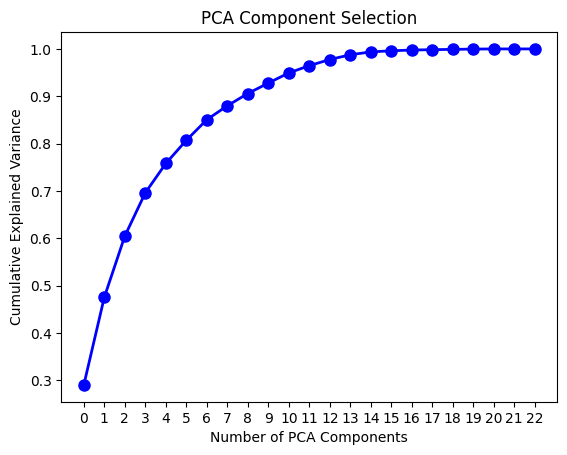

In [ ]:
pca = PCA()

pca_all = pca.fit(X_scaled)

components = pca_all.transform(X_scaled)

plt.plot(
    pca_all.explained_variance_ratio_.cumsum(),
    '-o', 
    markersize=8,
    color='blue',
    linewidth=2,
)
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Component Selection')
plt.xticks(range(len(pca_all.explained_variance_ratio_)))
plt.show()

With 5 components it is possible to explain more than 70% of the variance of the data set. <br>
With 6/7 componets, we can get more than 80%.

In [ ]:
# Choose the number of components which gives at least 70%
n_components = 5

# Perform PCA with the selected number of components
pca_5 = PCA(n_components=n_components)

customer_info_pca_fit = pca_5.fit(X_scaled)

customer_info_pca = pca_5.transform(X_scaled)

#principal_df = pd.DataFrame(data = customer_info_pca, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5'])


It is now possible to see the explained variance by each PC.

In [ ]:
customer_info_pca_fit.explained_variance_ratio_


array([0.28996307, 0.18533384, 0.1291922 , 0.09148462, 0.06195164])

In [ ]:
pc_components = pd.DataFrame(
    customer_info_pca_fit.components_.T, 
    columns = ['PC'+str(i) for i in range(0,5)], 
    index=customer_info_seg.columns)

pc_components.sort_values('PC0')

,PC0,PC1,PC2,PC3,PC4
year_first_transaction,-0.250957,0.084473,0.207265,0.114434,0.274993
lifetime_spend_electronics,-0.080211,0.423150,-0.091014,0.031058,-0.275023
percentage_of_products_bought_promotion,-0.062824,-0.213030,-0.164367,0.531757,0.108780
distinct_stores_visited,-0.037469,-0.272710,-0.254328,0.412743,-0.042824
lifetime_spend_videogames,-0.006509,0.442460,0.092667,0.136411,-0.177951
customer_gender,-0.002396,-0.002289,0.002955,0.004823,-0.015463
typical_hour,0.020480,0.397038,0.053797,0.021733,0.246278
Age,0.037615,-0.050128,0.064076,0.129815,-0.654747
highest_education,0.053129,0.096097,0.100290,-0.226210,-0.092000
lifetime_spend_vegetables,0.064771,-0.268698,0.224791,-0.410273,-0.169368


In [ ]:
pc_components.sort_values('PC4')

,PC0,PC1,PC2,PC3,PC4
Age,0.037615,-0.050128,0.064076,0.129815,-0.654747
lifetime_spend_electronics,-0.080211,0.423150,-0.091014,0.031058,-0.275023
number_complaints,0.156762,-0.115060,-0.125383,0.219980,-0.251999
lifetime_spend_nonalcohol_drinks,0.159989,0.380491,-0.078226,0.182574,-0.215173
lifetime_spend_videogames,-0.006509,0.442460,0.092667,0.136411,-0.177951
lifetime_spend_vegetables,0.064771,-0.268698,0.224791,-0.410273,-0.169368
highest_education,0.053129,0.096097,0.100290,-0.226210,-0.092000
kids_home,0.146470,-0.037545,0.391492,0.263786,-0.063138
has_loyalty_card,0.212760,-0.002745,-0.066463,-0.097946,-0.060648
total_spending,0.350112,0.118876,-0.141020,-0.095840,-0.048634


Here we can see how each variable affects the principal components. <br>
* In PC0, *lifetime_spend_meat* and *lifetime_spend_fish* have the highest positive influence, whereas *year_first_transaction* has the most negative influence. We could call them **Meat Eaters**. <br>
* For PC1, *lifetime_spend_videogames* has the highest positive influence and *lifetime_spend_vegetables* the most negative one. These would be the **Gamers**.
* Now for PC2, we have that *family_size* is has the biggest positive coefficient and *distinct_stores_visited* the most negative one, even if not much. These are the **Loyal Families**.
* Regarding PC3, *percentage_of_products_bought_promotion* has the highest coefficient, followed close by *distinct_stores_visited*, with *lifetime_spend_vegetables* and *highest_education* having the lowest negative values. This would be the **Uneducated Store Hoppers**.
* Finally, PC4 has *lifetime_spend_alcohol_drinks* as its positive highest coefficient and *Age*
 the lowest, thus they are **Young Alcoholics**.


# Determine optimal number of clusters

In [ ]:
dispersion = []
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init = 'auto').fit(customer_info_pca)
    dispersion.append(kmeans.inertia_)

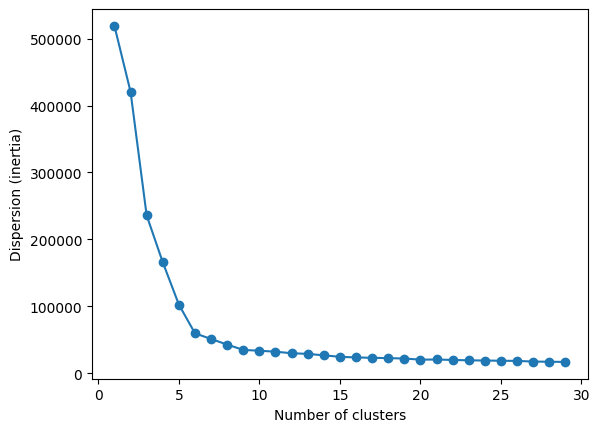

In [ ]:
plt.plot(range(1, 30), dispersion, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.show()

# K-Means Clustering

In [ ]:
# Apply k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=6, random_state = 0) # was 6
# kmeans.fit(customer_info_pca)
kmeans.fit(customer_info_pca) #X_scaled

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=0)

# Visualise the Clusters

# Segments

In [ ]:
customer_info_ppc['cluster_kmeans'] = kmeans.predict(customer_info_pca)

In [ ]:
customer_info_ppc.groupby(['cluster_kmeans']).mean()

<ipython-input-24-d3b7f32d9999>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  customer_info_ppc.groupby(['cluster_kmeans']).mean()


,customer_id,highest_education,customer_gender,Age,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,...,lifetime_spend_videogames,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,has_loyalty_card,family_size,total_spending
cluster_kmeans,,,,,,,,,,,,,,,,,,,,,
0,14963.501045,0.706853,0.500418,55.416841,0.995821,0.271208,1.548475,7.976181,14947.386126,199.949018,...,54.461137,4002.338696,0.150186,2000.037610,950681.487830,38.747756,-9.157710,0.600919,1.267029,20697.563936
1,14910.465640,0.188065,0.509336,55.884504,0.972281,0.094514,1.196920,18.999615,297.424639,19.468335,...,4.736285,478.525313,0.484143,2010.004812,950974.298805,38.747770,-9.158148,0.048316,1.066795,1446.264100
2,15177.480777,0.804466,0.497864,32.439223,0.224272,0.140971,0.163883,2.465243,3388.778641,636.759612,...,323.407379,293.860777,0.148164,2011.675340,948540.620751,38.742709,-9.160365,0.108544,0.365243,6385.530291
3,15070.718655,1.008894,0.505857,55.509111,0.689588,0.068547,0.500000,1.992625,200.406291,4999.557484,...,2002.197397,99.785249,0.100002,2009.978091,948143.663774,38.747749,-9.157489,0.100000,0.758134,9389.606291
4,14900.896168,0.940328,0.507664,56.478650,1.080474,0.754380,0.346533,1.996168,939.204745,120.658942,...,69.692883,180.338139,0.057494,2009.972080,949329.295775,38.748695,-9.157321,0.051825,1.834854,2720.521898
5,15022.564683,0.999780,0.498572,55.547551,3.147156,1.849989,0.934329,3.008785,4997.184494,199.940040,...,997.619152,2001.673622,0.200125,2009.955194,949396.822028,38.749527,-9.157407,0.301120,4.997145,10902.942236


In [ ]:
customer_info_seg.mean()

customer_id                                15005.369517
highest_education                              0.767750
customer_gender                                0.503426
Age                                           51.753711
kids_home                                      1.155404
teens_home                                     0.516827
number_complaints                              0.770169
distinct_stores_visited                        6.159636
lifetime_spend_groceries                    4008.813629
lifetime_spend_electronics                   972.556727
typical_hour                                  14.461107
lifetime_spend_vegetables                    568.474340
lifetime_spend_nonalcohol_drinks             633.505206
lifetime_spend_alcohol_drinks                382.203433
lifetime_spend_meat                          517.759119
lifetime_spend_fish                          517.399879
lifetime_spend_hygiene                       164.048667
lifetime_spend_videogames                    540

CHECK CUSTOMERS PER CLUSTER

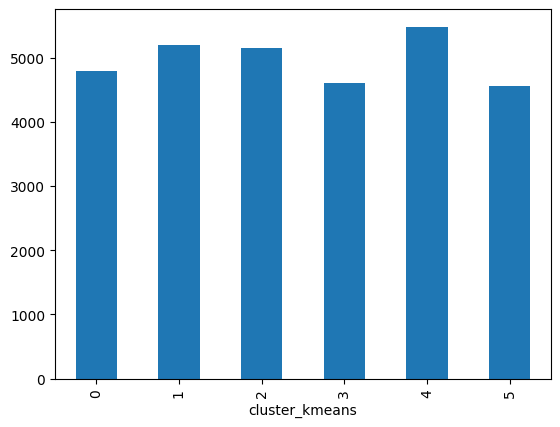

In [ ]:
customer_info_ppc.groupby(['cluster_kmeans']).size().plot(kind='bar')
plt.show()

# Hierarchical Clustering

In [ ]:
## Run this only once for computational reasons

# Define a list of linkage methods to test
linkage_methods = ['ward', 'complete', 'average', 'single']

# Define a range of number of clusters to test
n_clusters_range = range(2, 13)

# Create an empty dictionary to store results
results = {}

# Choose wheter to run the loop when running all
run_loop = True

if run_loop:
  # Loop over all combinations of linkage methods and number of clusters
  for linkage_method in linkage_methods:
      for n_clusters in n_clusters_range:
          
          # Create a new instance of the AgglomerativeClustering algorithm with current settings
          model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
          
          # Fit the model to the PCA data
          model.fit(customer_info_pca)
          
          # Calculate the silhouette score for the predicted labels
          score = silhouette_score(customer_info_pca, model.labels_)
          
          # Add the results to the dictionary
          if linkage_method not in results:
              results[linkage_method] = {}
          results[linkage_method][n_clusters] = score
            
  # Print the results
  for linkage_method in linkage_methods:
      print(f"Results for linkage method '{linkage_method}':")
      for n_clusters in n_clusters_range:
          score = results[linkage_method][n_clusters]
          print(f"\t{n_clusters} clusters: silhouette score = {score:.4f}")


Results for linkage method 'ward':
	2 clusters: silhouette score = 0.3805
	3 clusters: silhouette score = 0.4513
	4 clusters: silhouette score = 0.5130
	5 clusters: silhouette score = 0.5738
	6 clusters: silhouette score = 0.6263
	7 clusters: silhouette score = 0.6018
	8 clusters: silhouette score = 0.5635
	9 clusters: silhouette score = 0.6003
	10 clusters: silhouette score = 0.5829
	11 clusters: silhouette score = 0.5420
	12 clusters: silhouette score = 0.4695
Results for linkage method 'complete':
	2 clusters: silhouette score = 0.2466
	3 clusters: silhouette score = 0.3845
	4 clusters: silhouette score = 0.4116
	5 clusters: silhouette score = 0.4202
	6 clusters: silhouette score = 0.4132
	7 clusters: silhouette score = 0.4979
	8 clusters: silhouette score = 0.5787
	9 clusters: silhouette score = 0.4939
	10 clusters: silhouette score = 0.4609
	11 clusters: silhouette score = 0.4263
	12 clusters: silhouette score = 0.3516
Results for linkage method 'average':
	2 clusters: silhouette 

Results for linkage method 'ward':
	2 clusters: silhouette score = 0.3805
	3 clusters: silhouette score = 0.4513
	4 clusters: silhouette score = 0.5130
	5 clusters: silhouette score = 0.5738
	6 clusters: silhouette score = 0.6263
	7 clusters: silhouette score = 0.6018
	8 clusters: silhouette score = 0.5635
	9 clusters: silhouette score = 0.6003
	10 clusters: silhouette score = 0.5829
	11 clusters: silhouette score = 0.5420
	12 clusters: silhouette score = 0.4695
Results for linkage method 'complete':
	2 clusters: silhouette score = 0.2466
	3 clusters: silhouette score = 0.3845
	4 clusters: silhouette score = 0.4116
	5 clusters: silhouette score = 0.4202
	6 clusters: silhouette score = 0.4132
	7 clusters: silhouette score = 0.4979
	8 clusters: silhouette score = 0.5787
	9 clusters: silhouette score = 0.4939
	10 clusters: silhouette score = 0.4609
	11 clusters: silhouette score = 0.4263
	12 clusters: silhouette score = 0.3516
Results for linkage method 'average':
	2 clusters: silhouette score = 0.3805
	3 clusters: silhouette score = 0.4513
	4 clusters: silhouette score = 0.5130
	5 clusters: silhouette score = 0.5707
	6 clusters: silhouette score = 0.5437
	7 clusters: silhouette score = 0.6000
	8 clusters: silhouette score = 0.5999
	9 clusters: silhouette score = 0.5769
	10 clusters: silhouette score = 0.5752
	11 clusters: silhouette score = 0.5554
	12 clusters: silhouette score = 0.5727
Results for linkage method 'single':
	2 clusters: silhouette score = 0.2885
	3 clusters: silhouette score = 0.3915
	4 clusters: silhouette score = 0.3367
	5 clusters: silhouette score = 0.3113
	6 clusters: silhouette score = 0.3114
	7 clusters: silhouette score = 0.3115
	8 clusters: silhouette score = 0.3115
	9 clusters: silhouette score = 0.3737
	10 clusters: silhouette score = 0.2887
	11 clusters: silhouette score = 0.2517
	12 clusters: silhouette score = 0.2477

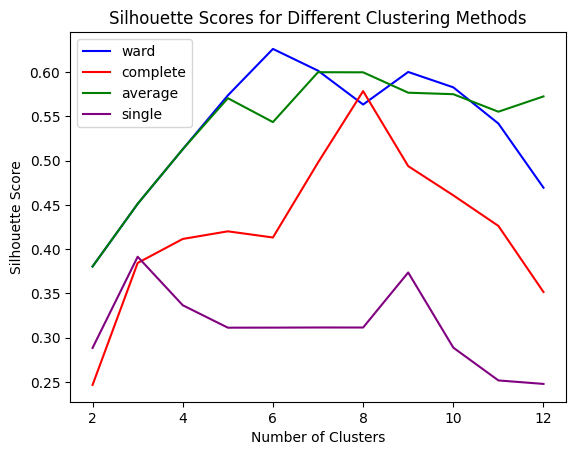

In [ ]:
import matplotlib.pyplot as plt

# Define the number of clusters to plot
num_clusters = range(2, 13)

# Define the colors for each clustering method
colours = {'ward': 'blue', 'complete': 'red', 'average': 'green', 'single': 'purple'}

# Create a line plot for each clustering method
for method, scores in results.items():
    plt.plot(num_clusters, list(scores.values()), label=method, color=colours[method])

# Set the plot title and axis labels
plt.title('Silhouette Scores for Different Clustering Methods')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

Best found for different linkage methods: <br>
<br>
Ward: <br> 
6 clusters: silhouette score = 0.6347 <br>
7 clusters: silhouette score = 0.6096 <br>
9 clusters: silhouette score = 0.6116 <br>
<br>
<br>
Average: <br>
7 clusters: silhouette score = 0.6186 <br>
8 clusters: silhouette score = 0.6182 <br>
10 clusters: silhouette score = 0.6108 <br>

<br>




In [ ]:
hierarchical = AgglomerativeClustering(n_clusters=9, linkage='ward')
hierarchical.fit(customer_info_pca)

AgglomerativeClustering(n_clusters=9)

In [ ]:
customer_info_ppc['cluster_hierarchical'] = hierarchical.fit_predict(customer_info_pca)


In [ ]:
# Checking the hierarchical and kmeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(customer_info_ppc.cluster_kmeans, customer_info_ppc.cluster_hierarchical),
    index = ['K-means {} Cluster'.format(i) for i in np.arange(0,9)],
    columns = ['Hierarchical {} Cluster'.format(i) for i in np.arange(0,9)],
)


,Hierarchical 0 Cluster,Hierarchical 1 Cluster,Hierarchical 2 Cluster,Hierarchical 3 Cluster,Hierarchical 4 Cluster,Hierarchical 5 Cluster,Hierarchical 6 Cluster,Hierarchical 7 Cluster,Hierarchical 8 Cluster
K-means 0 Cluster,5,0,4610,0,0,0,0,0,0
K-means 1 Cluster,3547,0,0,0,29,4722,9,2272,0
K-means 2 Cluster,0,0,0,2910,0,0,57,0,1854
K-means 3 Cluster,14,0,0,0,5144,0,0,0,0
K-means 4 Cluster,0,3049,0,0,0,0,1552,0,0
K-means 5 Cluster,0,0,0,0,0,0,0,0,0
K-means 6 Cluster,0,0,0,0,0,0,0,0,0
K-means 7 Cluster,0,0,0,0,0,0,0,0,0
K-means 8 Cluster,0,0,0,0,0,0,0,0,0


In [ ]:
hierarchical_8 = AgglomerativeClustering(n_clusters=8, linkage='average')
customer_info_ppc['cluster_average_8'] = hierarchical_8.fit_predict(customer_info_pca)


In [ ]:
customer_info_ppc.mean()

<ipython-input-25-f97a3c1c8e68>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  customer_info_ppc.mean()


customer_id                                 15005.369517
highest_education                               0.767750
customer_gender                                 0.503426
Age                                            51.753711
kids_home                                       1.155404
teens_home                                      0.516827
number_complaints                               0.770169
distinct_stores_visited                         6.159636
lifetime_spend_groceries                     4008.813629
lifetime_spend_electronics                    972.556727
typical_hour                                   14.461107
lifetime_spend_vegetables                     568.474340
lifetime_spend_nonalcohol_drinks              633.505206
lifetime_spend_alcohol_drinks                 382.203433
lifetime_spend_meat                           517.759119
lifetime_spend_fish                           517.399879
lifetime_spend_hygiene                        164.048667
lifetime_spend_videogames      

In [ ]:
customer_info_ppc.drop('customer_id', axis = 1).groupby(['cluster_kmeans']).mean()

<ipython-input-26-d185f89a3fbe>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  customer_info_ppc.drop('customer_id', axis = 1).groupby(['cluster_kmeans']).mean()


,highest_education,customer_gender,Age,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,...,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,has_loyalty_card,family_size,total_spending,cluster_hierarchical,cluster_average_8
cluster_kmeans,,,,,,,,,,,,,,,,,,,,,
0,1.007801,0.505742,55.473673,0.688841,0.068472,0.499458,1.992633,200.295125,4994.162297,20.953846,...,0.100109,2009.987432,948143.663774,38.747730,-9.157504,0.099892,0.757313,9381.152113,1.997833,4.996750
1,0.876642,0.502599,44.925040,0.668872,0.458739,0.258626,2.224123,2097.639947,370.902354,14.122696,...,0.101117,2010.794215,948886.193357,38.745773,-9.158837,0.079686,1.127611,4435.301635,3.751205,4.234805
2,0.714582,0.501141,55.353661,0.992118,0.270691,1.544078,7.940469,14874.752748,199.965775,11.968056,...,0.150549,2000.099564,950665.765921,38.747792,-9.157658,0.602572,1.262809,20625.876996,4.958307,2.972827
3,0.185925,0.509500,55.792168,0.974215,0.091314,1.192323,19.106630,298.121753,19.520744,9.042071,...,0.485837,2010.007755,950779.687243,38.747766,-9.158045,0.047111,1.065529,1449.966072,3.989143,5.982164
4,0.984569,0.498587,55.424038,3.116279,1.835036,0.933710,3.007824,4997.658552,200.031732,17.414040,...,0.200116,2009.969789,949397.557778,38.749523,-9.157487,0.293414,4.951315,10902.337318,2.686590,0.024560


In [ ]:
customer_info_ppc.drop('customer_id', axis = 1).groupby(['cluster_hierarchical']).mean() # best probably

<ipython-input-27-5908fd3824ba>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  customer_info_ppc.drop('customer_id', axis = 1).groupby(['cluster_hierarchical']).mean() # best probably


,highest_education,customer_gender,Age,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,...,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,has_loyalty_card,family_size,total_spending,cluster_kmeans,cluster_average_8
cluster_hierarchical,,,,,,,,,,,,,,,,,,,,,
0,0.249019,0.501402,41.588895,0.339596,0.335109,0.339877,1.988222,428.933259,393.390073,16.561413,...,0.136928,2012.404375,945378.281690,38.739711,-9.162454,0.039821,0.674706,2294.461862,1.006450,2.013460
1,0.935389,0.501476,56.394228,3.857002,2.264349,0.938012,3.007215,4993.621515,200.062316,17.385044,...,0.200168,2009.942932,948487.943960,38.749500,-9.157393,0.263365,6.121351,10915.381765,4.000000,0.036405
2,1.008894,0.505857,55.509111,0.689588,0.068547,0.500000,1.992625,200.406291,4999.557484,20.951844,...,0.100002,2009.978091,948143.663774,38.747749,-9.157489,0.100000,0.758134,9389.606291,0.000000,5.000000
3,1.148454,0.500344,55.387629,0.995876,0.281100,1.531271,7.993471,15037.748110,199.839175,11.815120,...,0.149966,1999.916151,950751.211388,38.747706,-9.158002,0.965636,1.276976,20792.993127,2.000000,3.000000
4,0.188865,0.508989,55.815968,0.973903,0.093756,1.190412,19.078484,298.566596,20.414460,9.029190,...,0.485230,2009.997487,950974.298805,38.747799,-9.158071,0.048521,1.067659,1451.648560,2.988788,5.973710
5,1.007624,0.509530,55.167302,1.160525,0.771495,0.310885,2.000212,997.551461,50.036637,9.988564,...,0.049988,2010.014824,950291.762712,38.748634,-9.157192,0.049979,1.932020,2737.412749,1.000000,6.994917
6,1.109394,0.496910,53.385661,1.612485,0.958591,0.925216,3.007417,5003.420890,199.901731,17.433869,...,0.200027,2009.958591,950487.393635,38.749640,-9.157437,0.368974,2.571075,10875.116811,3.912855,0.032138
7,1.582746,0.490317,28.687060,0.162852,0.000000,0.018486,3.009683,6998.608715,1002.705986,18.956426,...,0.149835,2009.927377,949076.200441,38.749198,-9.156626,0.199824,0.162852,11309.376761,1.000000,2.000000
8,0.000000,0.500000,55.446063,1.001079,0.256742,1.581985,8.009169,14923.555556,200.176375,12.070658,...,0.149938,2000.148328,948872.187500,38.747815,-9.157233,0.025890,1.257821,20663.417476,2.000000,3.000000


In [ ]:
customer_info_ppc.drop('customer_id', axis = 1).groupby(['cluster_average_8']).mean()

<ipython-input-28-1e84005f4e28>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  customer_info_ppc.drop('customer_id', axis = 1).groupby(['cluster_average_8']).mean()


,highest_education,customer_gender,Age,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,...,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,has_loyalty_card,family_size,total_spending,cluster_kmeans,cluster_hierarchical
cluster_average_8,,,,,,,,,,,,,,,,,,,,,
0,1.002208,0.499117,55.331347,3.020309,1.757174,0.934437,3.006402,4997.390508,200.194923,17.402649,...,0.200113,2009.946137,949370.094821,38.749521,-9.157462,0.302649,4.777483,10900.731567,3.981015,2.757174
1,0.486486,0.513514,57.621622,6.117117,4.441441,0.918919,3.045045,4998.261261,193.171171,17.630631,...,0.200441,2010.135135,941389.285714,38.750473,-9.154132,0.063063,10.558559,10956.036036,4.000000,1.000000
2,0.771322,0.496602,36.740741,0.270642,0.204893,0.223242,2.388379,2984.459225,627.019878,17.448352,...,0.142381,2011.417771,948260.483819,38.743456,-9.160253,0.104995,0.475535,5808.623004,1.010873,2.751614
3,0.701511,0.500210,55.410369,0.997901,0.271620,1.551008,7.999580,14993.307935,199.970403,11.914568,...,0.149955,2000.006507,950719.653254,38.747749,-9.157703,0.599916,1.269521,20742.566331,2.000000,4.945844
4,0.625000,0.625000,61.125000,3.375000,2.625000,0.375000,2.250000,1051.375000,50.750000,10.250000,...,0.050804,2011.750000,940259.000000,38.747965,-9.179813,0.125000,6.000000,2801.125000,1.000000,5.000000
5,1.008894,0.505857,55.509111,0.689588,0.068547,0.500000,1.992625,200.406291,4999.557484,20.951844,...,0.100002,2009.978091,948143.663774,38.747749,-9.157489,0.100000,0.758134,9389.606291,0.000000,2.000000
6,0.189089,0.509998,55.763929,0.977286,0.092409,1.188119,19.149874,298.286546,19.617162,9.038633,...,0.486496,2010.007571,950974.298805,38.747792,-9.157994,0.048728,1.069695,1451.617550,2.993788,3.990681
7,1.008273,0.509334,55.157191,1.156767,0.768350,0.310776,1.999788,997.460119,50.035426,9.988120,...,0.049987,2010.011880,950334.455319,38.748635,-9.157154,0.049852,1.925117,2737.304625,1.000000,5.000000


Há a component familia
Há a component dos gamers

Aplicar T-SNE e HUEMAP a seguir cos clusters
